#  A Gentle Introduction to OpenCV

The first step to learning OpenCV is understanding the basics. This guide will show you how to open, display, modify and save images. A  proper understanding of these building blocks is necessary before moving on to more advanced topics.

##  Prerequisites

1. Python
2. OpenCV
3. Numpy
4. Matplotlib

Let me know if you need help installing these dependencies; I would be happy to help. 

##  A Hello World in OpenCV 

The most basic thing you can do with OpenCV would probably be opening and displaying an image. It makes a good 'hello world' project because it is easy and provides a great entry point to discussion on how OpenCV works. 

[Here is the image we will use](./4.2.03.tiff). I suggest you take a look at it so you know what the correct output should look like.

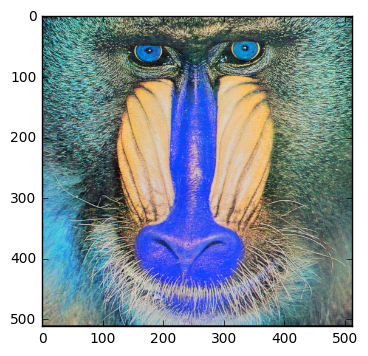

In [44]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('4.2.03.tiff')
plt.imshow(image)
plt.show()


As you can see this output is wrong. It seems like all the red areas have become blue!

Unlike most modern applications, For historic reasons OpenCV uses the BGR color space as default intead of the more traditional RGB. This means that whenever we mix OpenCV with other libraries (like matplotlib) we need to be careful to convert to the appropriate colorspace as needed. 

OpenCV images are 3 dimensional numpy arrays. The dimensions of the array are width, height, color. Since the color space of our image is BGR, the color dimension will contain arrays of size 3. To convert our image to RGB we just need to swap the 0th and 2nd indices of the color dimension. With numpy we can do this in just one line. 

Lets try displaying our image again

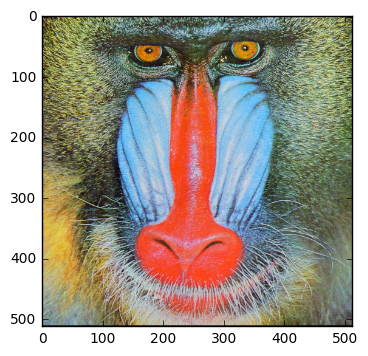

In [48]:
image = cv2.imread('4.2.03.tiff')
# Switches blue and red components to convert image to RGB
image[:, :, (2, 0)] = image[:, :, (0, 2)]
plt.imshow(image)
plt.show()

We can write a function to make future conversion easier:

In [52]:
def switchRB(image):
    image[:, :, (2, 0)] = image[:, :, (0, 2)]
    return image


##  Basic Image Editing

Since OCV images are just numpy arrays, editing images is  straightforward. Lets say we want to remove the red channel of an image. 


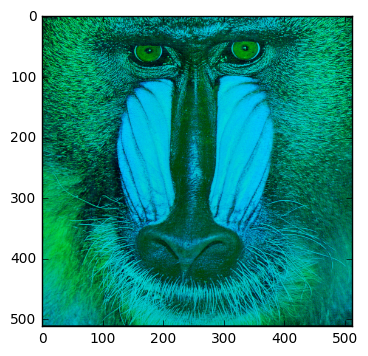

In [55]:
rgb_image = switchRB(cv2.imread('4.2.03.tiff'))
rgb_image[:, :, 0] = 0
plt.imshow(rgb_image)
plt.show()

We can convert a color image to grayscale by averaging the values of each pixel. 


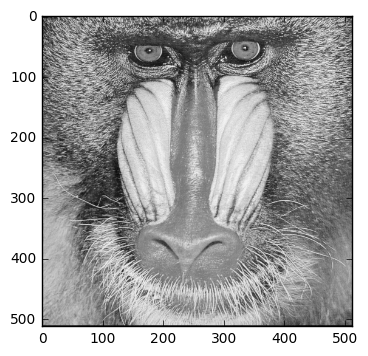

In [59]:
rgb_image = switchRB(cv2.imread('4.2.03.tiff'))
gray_image = np.mean(rgb_image, axis=2)
plt.imshow(gray_image, cmap='gray')
plt.show()


We can rearrange part of the image as follows:

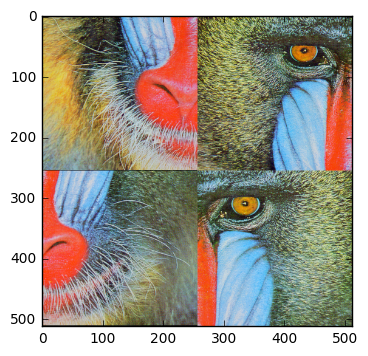

In [62]:
rgb_image = switchRB(cv2.imread('./4.2.04.tiff'))
half_x = rgb_image.shape[1]/2
half_y = rgb_image.shape[0]/2

new_image = np.zeros_like(rgb_image)
new_image[:half_y, :half_x] = image[half_y:, :half_x]
new_image[half_y:, :half_x] = image[half_y:, half_x:]
new_image[half_y:, half_x:] = image[:half_y, half_x:]
new_image[:half_y, half_x:] = image[:half_y, :half_x]

plt.imshow(new_image)
plt.show()


OpenCV also provides primitive drawing functions for drawing lines and circles

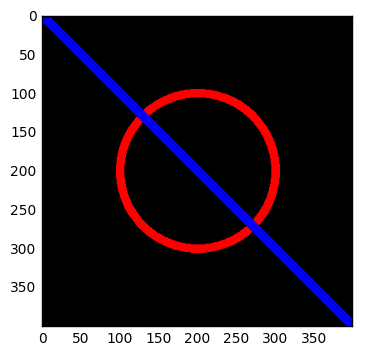

In [76]:
image = np.zeros([400, 400, 3])
cv2.circle(image, (200, 200), 100, (1, 0, 0), 10)
cv2.line(image, (0, 0), (400, 400), (0, 0, 1), 10)
plt.imshow(image)
plt.show()

## Visualizing Feature Detection

These drawing functions can be useful for visualizing image features. Below is an example that visualizes detected features using the FAST algorithm. How it works it out of the scope of this tutorial, but notice how the features tend to concentrate around interesting regions like this woman's eyes, nose and mouth. Feature detection similar to this is used in face recognition, identification, etc. 

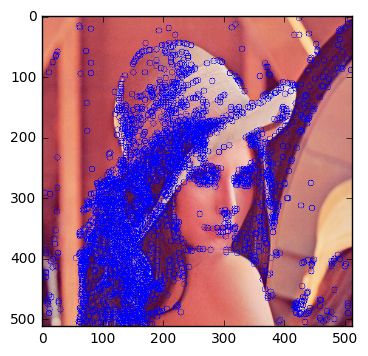

In [101]:
# FAST is a feature detector built into OpenCV. 
# Essentially it is looking for pixels that have high contrast with their neightbors
fast = cv2.FastFeatureDetector()
fast.setInt('threshold', 12)

image = cv2.imread('4.2.04.tiff')
features = fast.detect(image)
for f in features:
    x, y = f.pt
    cv2.circle(image, (int(x), int(y)), 5, (255, 0, 0), 1)

plt.imshow(switchRB(image))
plt.show()


## Saving Images

OpenCV makes it incredible easy to save you create. It automatically handles file conversion. Here is an example:



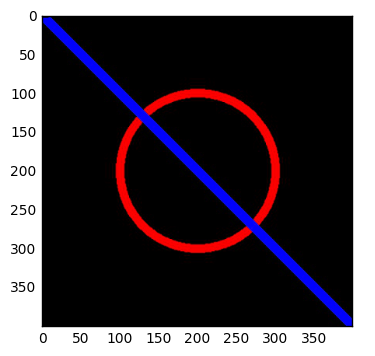

In [117]:
image = np.zeros([400, 400, 3])
cv2.circle(image, (200, 200), 100, (255, 0, 0), 10)
cv2.line(image, (0, 0), (400, 400), (0, 0, 255), 10)
cv2.imwrite('out.jpeg', image)

saved_image = cv2.imread('out.jpeg')
plt.imshow(saved_image)
plt.show()

## Using Pure OpenCV to Display Images

I'm using matplotlib to display OpenCV images because Jupyter notebooks do not support OpenCV's methods for displaying images. 

To display an image with OpenCV you can use the following: 
```
image = cv2.imread('4.2.03.tiff')
cv2.imshow(image)
cv2.waitKey(0)
```

There are two things to note here. First notice that we are not converting the color space. All OpenCV methods assume BGR images. Second, notice the ```cv2.waitKey(0)``` method. This method blocks execution of the program while an image is being displayed. Once a user types a key, this method stops blocking and returns the key code pressed. The parameter indicates how many milliseconds to wait for user input. A value of 0 waits forever.
